In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# train = pd.read_csv("../asset/train.csv")
# test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("./asset/weather+holyday_201807041434.csv")
train_key = pd.read_csv("./asset/df_train_with_station_nbr201806202007.csv")
# key = pd.read_csv("../asset/key.csv")
# submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train_key.shape)
# print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
# print("key  data : ", key.shape)
# print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf
import datetime
from dateutil.parser import parse

# 원본을 유지하기 위해서 카피
df_train_key = train_key.copy()
df_weather = weather.copy()
# df_key = key.copy()
# df_test = test.copy()

Train data :  (4617600, 5)
weather  data :  (19665, 25)


In [2]:
df_weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,holiday
0,1,2012-01-01,52,31,41,11,36,40,24,0,...,29.78,29.92,3.6,20.0,4.6,2012,1,1,6,holiday
1,1,2012-01-02,50,31,40,10,26,35,25,0,...,29.44,29.62,9.8,24.0,10.3,2012,1,2,0,regular day
2,1,2012-01-03,32,11,21,-8,4,18,44,0,...,29.67,29.87,10.8,31.0,11.6,2012,1,3,1,regular day
3,1,2012-01-04,28,9,18,-11,-1,14,47,0,...,29.86,30.03,6.3,27.0,8.3,2012,1,4,2,regular day
4,1,2012-01-05,38,25,31,1,13,25,34,0,...,29.67,29.84,6.9,25.0,7.8,2012,1,5,3,regular day


In [3]:
train_preprocess = pickle.load(open("./asset/preprocess_date.pkl", "rb"))

In [4]:
train_preprocess.shape

(236038, 19)

In [5]:
train_preprocess[train_preprocess["station_nbr"]!=5].shape

(229230, 19)

In [6]:
train_preprocess = train_preprocess[["date","store_nbr","item_nbr", "station_nbr" ,"units"]]

In [7]:
train_preprocess.head()

,date,store_nbr,item_nbr,station_nbr,units
0,2012-01-01,1,9,1,29
1,2012-01-01,1,28,1,2
2,2012-01-01,1,40,1,0
3,2012-01-01,1,47,1,0
4,2012-01-01,1,51,1,1


In [8]:
df_weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,holiday
0,1,2012-01-01,52,31,41,11,36,40,24,0,...,29.78,29.92,3.6,20.0,4.6,2012,1,1,6,holiday
1,1,2012-01-02,50,31,40,10,26,35,25,0,...,29.44,29.62,9.8,24.0,10.3,2012,1,2,0,regular day
2,1,2012-01-03,32,11,21,-8,4,18,44,0,...,29.67,29.87,10.8,31.0,11.6,2012,1,3,1,regular day
3,1,2012-01-04,28,9,18,-11,-1,14,47,0,...,29.86,30.03,6.3,27.0,8.3,2012,1,4,2,regular day
4,1,2012-01-05,38,25,31,1,13,25,34,0,...,29.67,29.84,6.9,25.0,7.8,2012,1,5,3,regular day


In [9]:
df_total = train_preprocess.merge(df_weather, on=["date","station_nbr"],how="inner")

In [16]:
df_total.dtypes

date            object
store_nbr        int64
item_nbr         int64
station_nbr      int64
units            int64
tmax             int64
tmin             int64
tavg             int64
depart           int64
dewpoint         int64
wetbulb          int64
heat             int64
cool             int64
sunrise         object
sunset          object
codesum         object
snowfall       float64
preciptotal    float64
stnpressure    float64
sealevel       float64
resultspeed    float64
resultdir      float64
avgspeed       float64
year             int64
month            int64
day              int64
weekday          int64
holiday         object
dtype: object

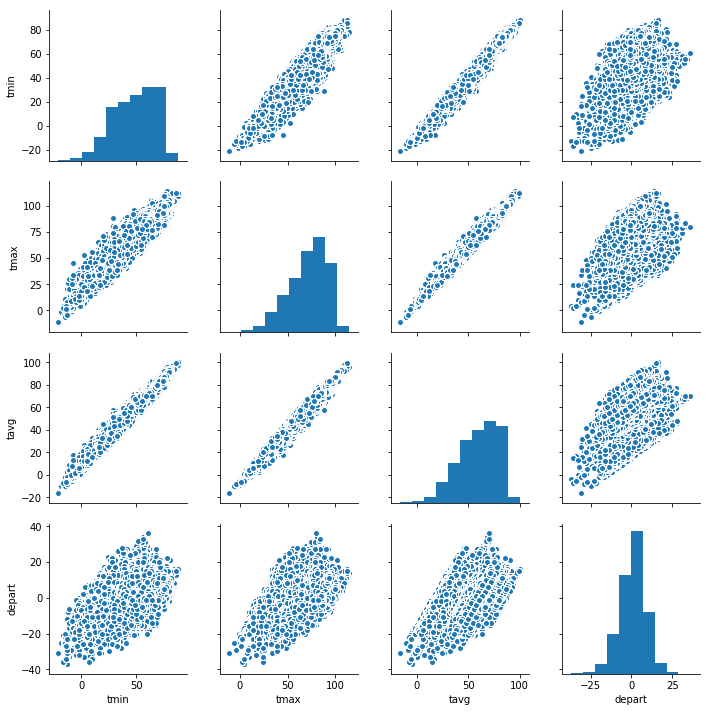

In [11]:
from statsmodels.datasets.longley import load_pandas
dfX = df_total[["tmin","tmax","tavg","depart"]]
sns.pairplot(dfX)
plt.show()

In [12]:
dfX.corr()

,tmin,tmax,tavg,depart
tmin,1.000000,0.912910,0.977588,0.385424
tmax,0.912910,1.000000,0.978207,0.443458
tavg,0.977588,0.978207,1.000000,0.424028
depart,0.385424,0.443458,0.424028,1.000000


In [13]:
model = sm.OLS.from_formula("units ~ C(store_nbr):C(item_nbr) + 0", df_total)
# result = model.fit()
# print(result.summary())

In [14]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2097.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:02:12   Log-Likelihood:            -1.0351e+06
No. Observations:              229230   AIC:                         2.071e+06
Df Residuals:                  228983   BIC:                         2.073e+06
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(stor

In [24]:
cf.saveDataFrameToCsv(df_total, 'weather+holyday')

NameError: name 'df' is not defined